In [9]:
import pandas as pd 
import seaborn as sns 
import numpy as np 
import matplotlib.pyplot as plt 

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

df = pd.read_csv('./data/train.csv')
print(df.shape)
df[:1]

(1460, 81)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500


# Obtain Integer and Float Columns

In [10]:
df=df.select_dtypes(['int','float'])
df=df.fillna(df.mean())
print(df.shape)

(1460, 38)


# Split into Train and Test

In [11]:
X = df.drop(columns='SalePrice')
y = df['SalePrice']

X_train,X_test,y_train,y_test = train_test_split(X,
                                                 y,
                                                 train_size=.7,
                                                 random_state=0)

# Fit Model

In [12]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

# Make Predictions

In [13]:
predictions = model.predict(X_test)

# Model Evaluation

In [14]:
accuracy = r2_score(y_test, predictions)
print(str(accuracy)[:4])

0.71


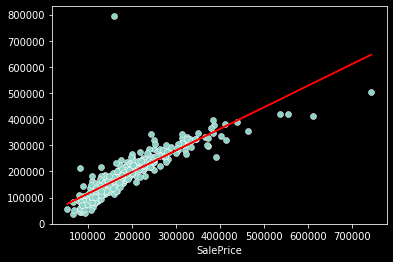

In [21]:
preds_series= pd.Series(predictions) 
a,b = np.polyfit(y_test,preds_series,1)

sns.scatterplot(x=y_test,
                y=predictions)
plt.plot(y_test, a*y_test+b, color='red')